# Clustering & PCA Assignment :- Rohit Keshari

# Problem Statment - 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

In [1]:
# import the liberary

# to perform the dataframe operation
import numpy as np
import pandas as pd

# to perform the data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# to supress Warnings
import warnings
warnings.filterwarnings('ignore')

# to perform PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# to pefrom K-Means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# to perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


### The steps are broadly:

1. [Step 1: Reading and Understanding the Data](#1)
    - Loading the data - Country-data
    - Loading the data - Data-dictionary
    
1. [Step 2: Data Preparation](#2)
    - Shape of data
    - Data information
    - Data type information
    - Duplicate contry check and check the spelling and unique-ness
    - Missing Value check
    
1. [Step 3:EDA(Exploratory Data Analytics)](#3)
    - Univariate analysis
    - Heatmap
    - Pairplot
    
1. [Step 4: Data Preparation](#4)
    - Outlier Analysis and Treatment
    - Rescaling
    
1. [Step 5: PCA(Principal Components Analysis)](#5)
    - PCA on Scaled data
    - Cumulative variance explained
    - Principal Components Selection
    - Apply the PCA on final data set with no of principal components
    - Visualize the PCA data
    
1. [Step 6: Hopkins Statistics Test](#6)
   - Hopkins Score Calculation
   
1. [Step 7: Model Building - K-means Clustering](#7)
   - K-means Clustering
   - Silhouette Analysis
   - Elbow Curves
   - Decide the Cluster number
   - Assign the cluster ID to country
   - Visualize the data after assignment of ID

1. [Step 8: Model Building - Hierarchial Clustering](#8)
   - Hierarchial Clustering - single linkage
   - Hierarchial Clustering - complete linkage
   - Assign the cluster ID to country
   - Visualize the data after assignment of ID
   - Decide the clustering which you want to choose for final Analysis
   
1. [Step 9: Final Analysis](#9)<br>
   - Final Country list Preparation on gdpp, child_mort and income     

1. [Step 10 : Closing Statement and Top 10 country direst need of aid](#10)<br>



<a id="1"></a>
# 1. Read and understand the data

In [2]:
# read the data
country = pd.read_csv('Country-data.csv')

In [3]:
# head part of the data Country
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# read the dictionary data
country_dic = pd.read_csv('data-dictionary.csv')

In [5]:
# to check the each columns desctiption so that we have complete understanding of Country data
country_dic.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


<a id="2"></a> <br>
# Step 2: Data Preparation

In [6]:
# shape of data set
country.shape

(167, 10)

In [7]:
# info of the data set
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
# Check the datatype of each columns and see if it required to convert the datatype of any columns
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [9]:
# check some statistical information
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# check the null value 
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
# Check the duplicates entry for columns country

country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [12]:
# check the uniqueness of country column data
country.country.is_unique

True

In [13]:
# check the data set and see the unique of country name
country['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

<a id="3"></a> <br>
# Step 3: EDA (Exploratory Data Analytics)


### Univariate Analysis

- We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with  using some socio-economic and health factors that determine the overall development of the country.

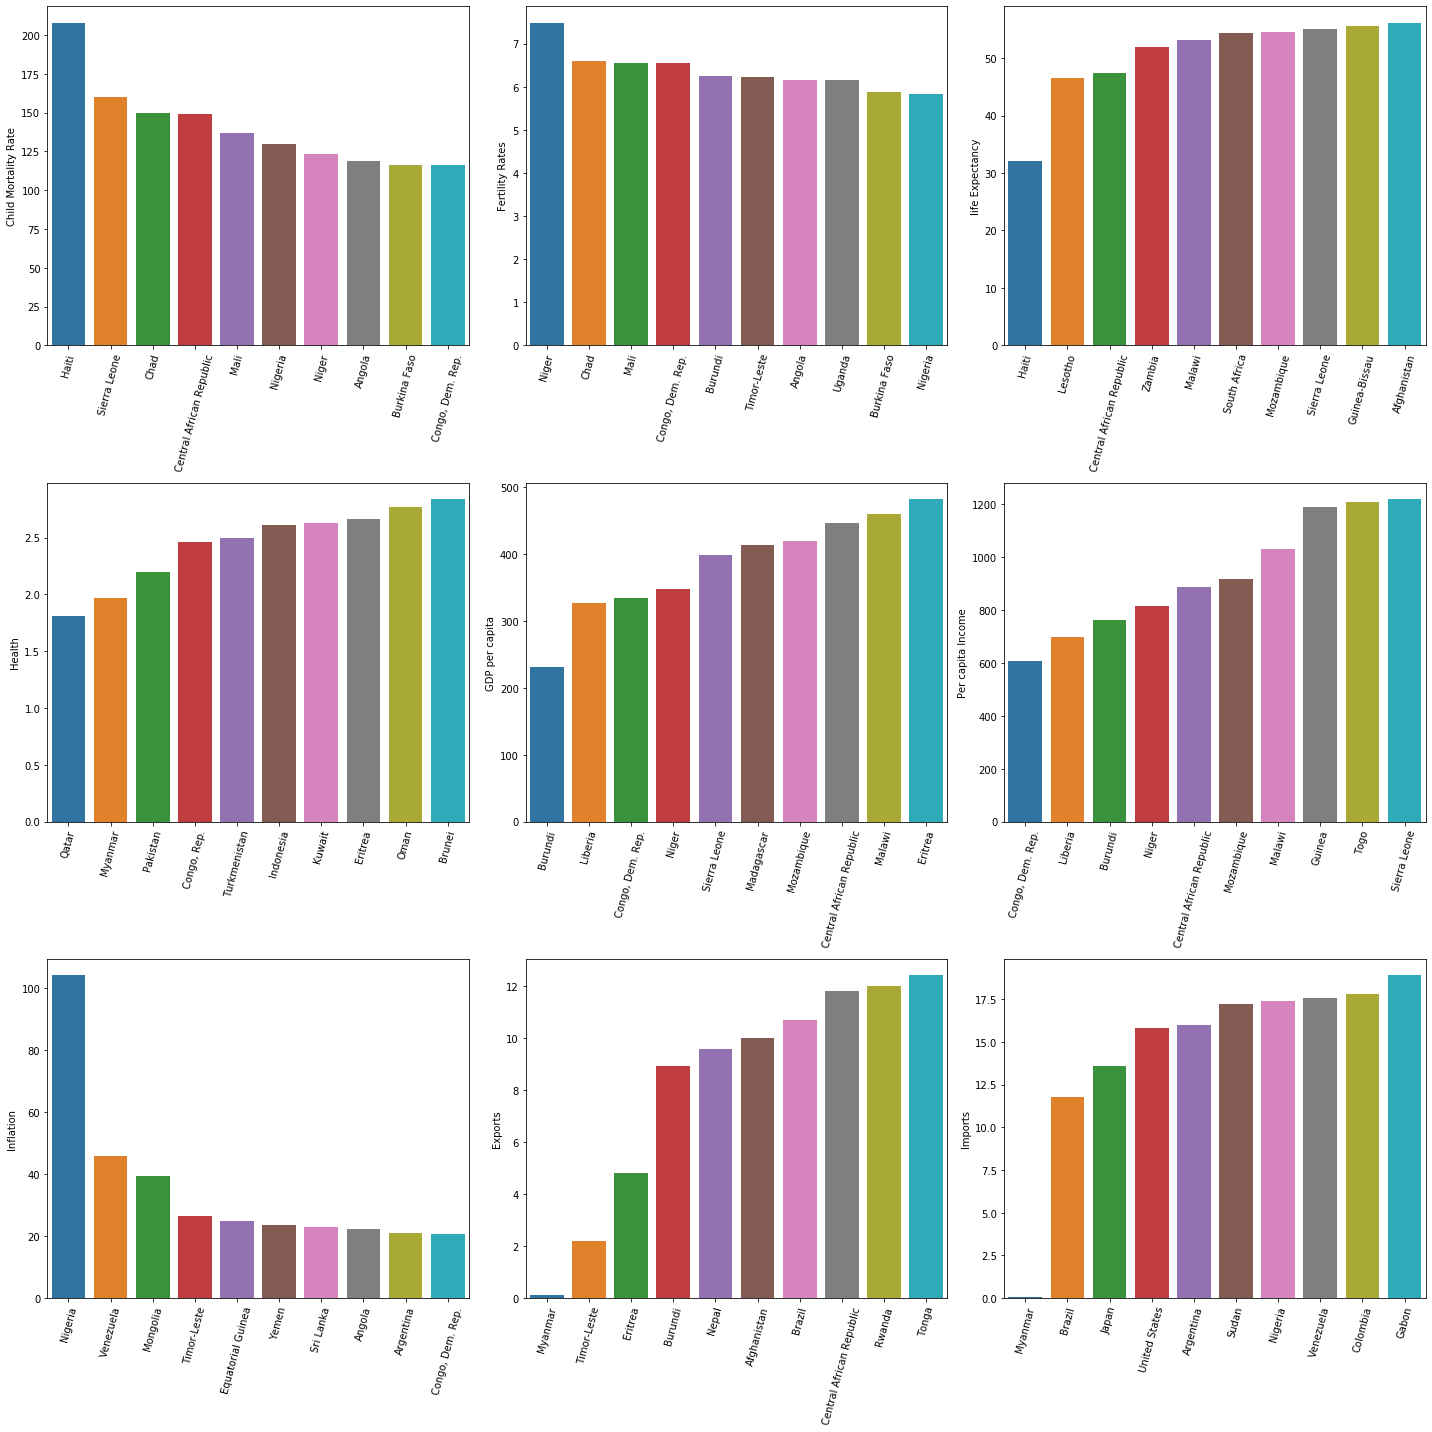

In [14]:
# We will have a look on the top and lowest 10 countries for each factor.
fig, axs = plt.subplots(3,3,figsize = (20,20))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

child_mort_top10 = country[['country','child_mort']].sort_values('child_mort', ascending= False).head(10)
plot1 = sns.barplot(x='country', y= 'child_mort', data = child_mort_top10, ax = axs[0,0])
plot1.set(xlabel= '', ylabel = 'Child Mortality Rate')


# Fertility Rates : The number of children that would be born to each woman if the current age-fertility rates remain the same.

total_fer_top10 = country[['country', 'total_fer']].sort_values('total_fer', ascending = False).head(10)
plot1 = sns.barplot(x= 'country', y='total_fer', data = total_fer_top10, ax = axs[0,1])
plot1.set(xlabel= '', ylabel = "Fertility Rates")

# life Expectancy : The average number of years a new born child would live if the current mortality patterns are to remain the same

life_expec_bot10 = country[['country', 'life_expec']].sort_values('life_expec', ascending = True).head(10)
plot1 = sns.barplot(x= 'country', y='life_expec', data = life_expec_bot10, ax = axs[0,2])
plot1.set(xlabel= '', ylabel = "life Expectancy")


# Health :Total health spending as %age of Total GDP.

health_bot10 = country[['country','health']].sort_values('health', ascending = True).head(10)
plot1 = sns.barplot(x='country', y='health', data= health_bot10, ax = axs[1,0])
plot1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

gdpp_bot10 = country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plot1 = sns.barplot(x='country', y='gdpp', data= gdpp_bot10, ax = axs[1,1])
plot1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

income_bot10 = country[['country','income']].sort_values('income', ascending = True).head(10)
plot1 = sns.barplot(x='country', y='income', data= income_bot10, ax = axs[1,2])
plot1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

inflation_top10 = country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plot1 = sns.barplot(x='country', y='inflation', data= inflation_top10, ax = axs[2,0])
plot1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

exports_bot10 = country[['country','exports']].sort_values('exports', ascending = True).head(10)
plot1 = sns.barplot(x='country', y='exports', data= exports_bot10, ax = axs[2,1])
plot1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

imports_bot10 = country[['country','imports']].sort_values('imports', ascending = True).head(10)
plot1 = sns.barplot(x='country', y='imports', data= imports_bot10, ax = axs[2,2])
plot1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 75)
    
plt.tight_layout() # This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.

plt.savefig('EDA_uni-variate for 10 top and bottom country')

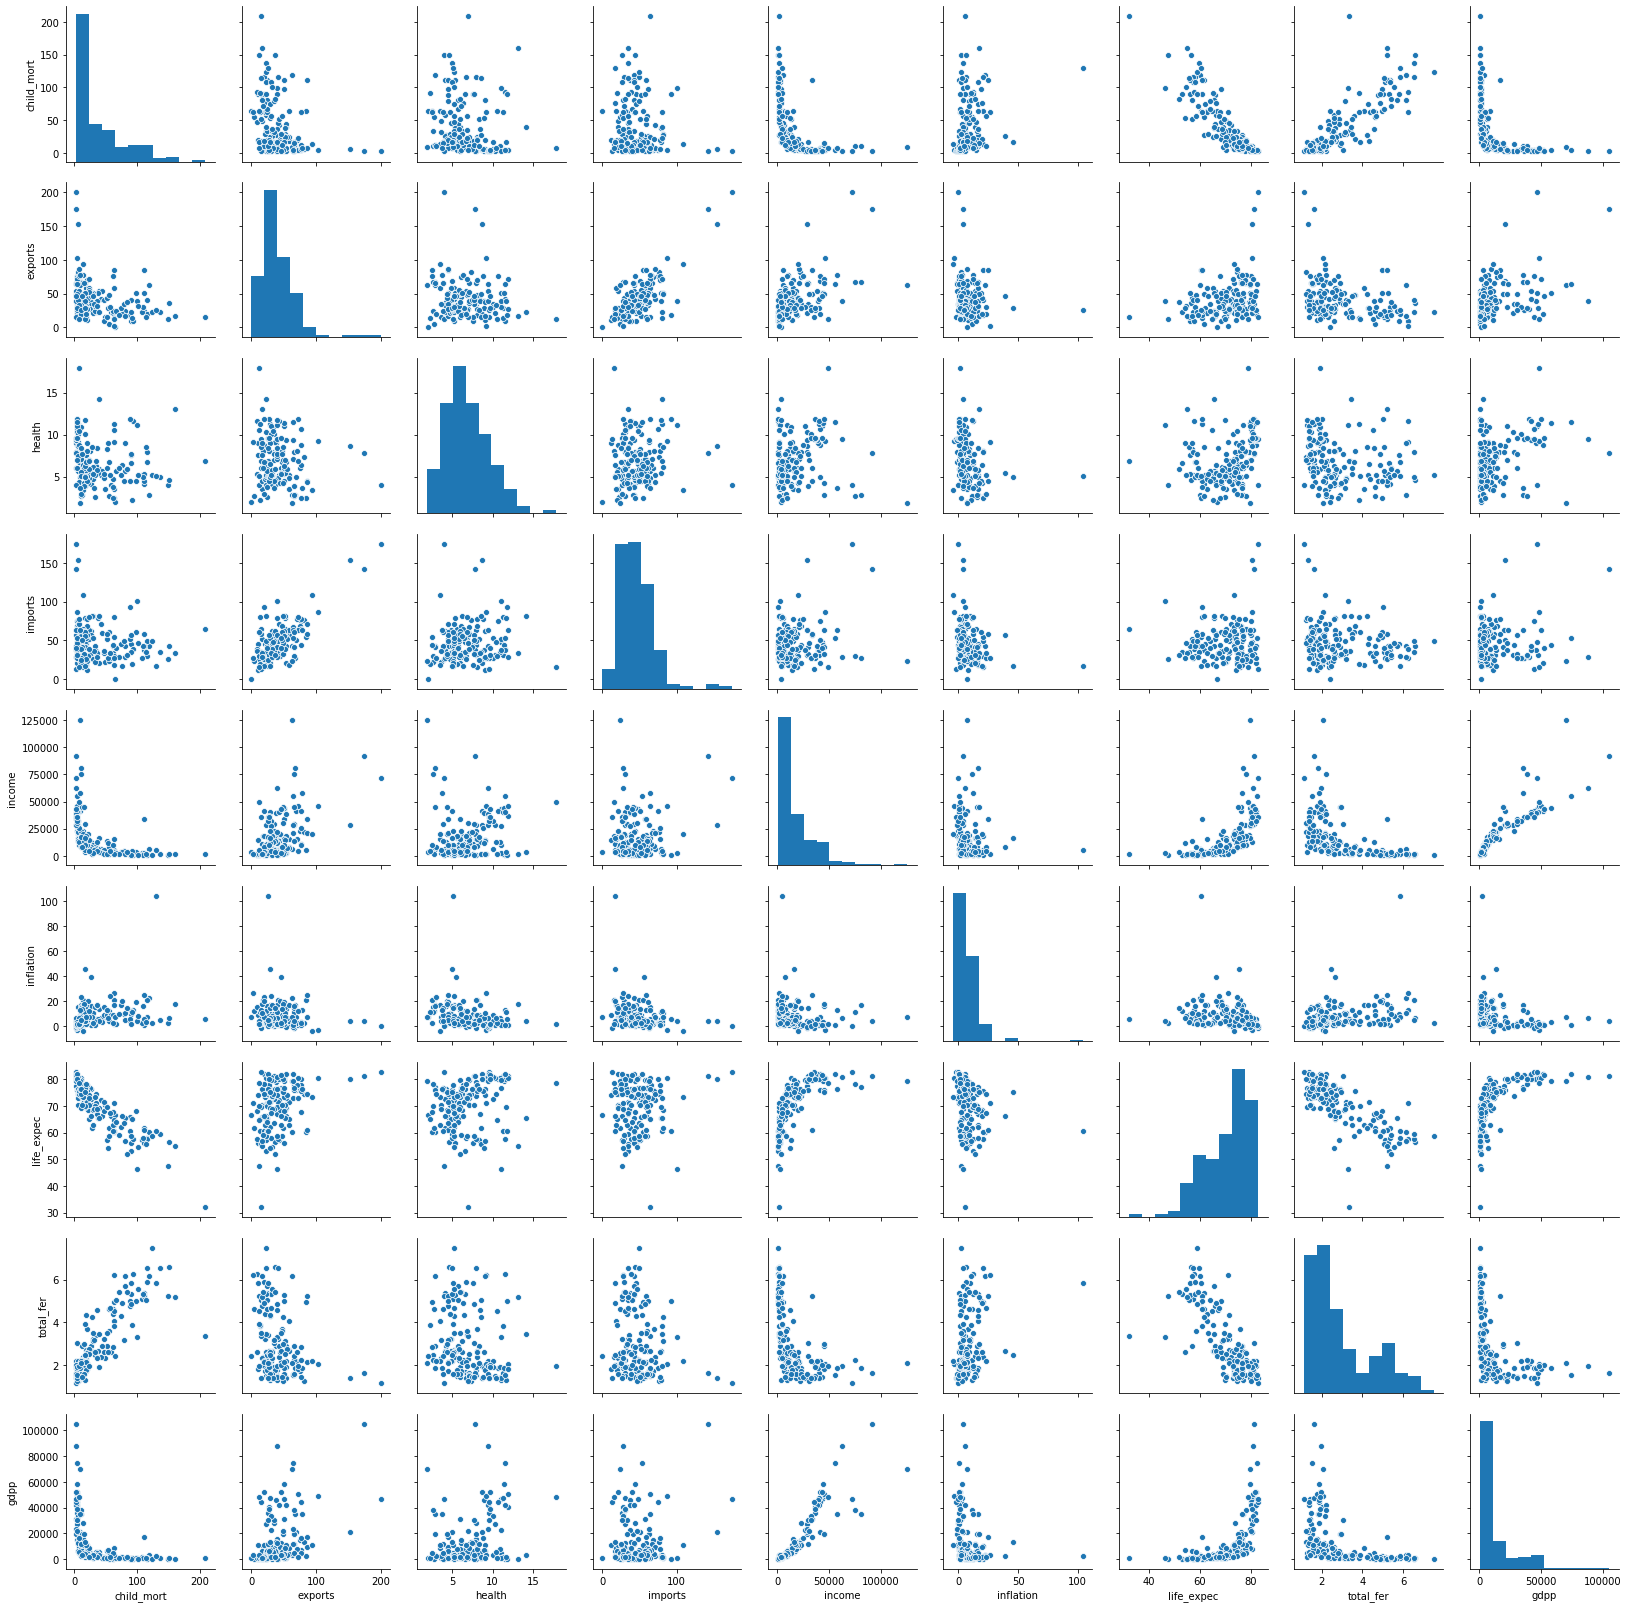

In [15]:
# pairplot for each component and see how the data is spread with each other
sns.pairplot(country)

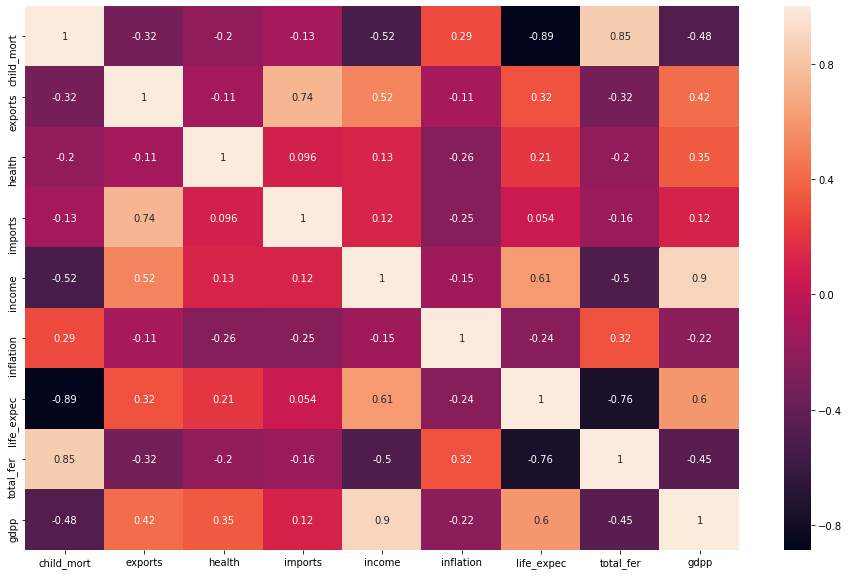

In [16]:
# correlation coefficients to see which feature has maximum correlation

plt.figure(figsize = (16, 10))
sns.heatmap(country.corr(), annot = True)
plt.savefig('correlation coefficients of data')

#### Inference:
- Income and gdpp are positive correlation
- Imports and Exports are positive correlation
- Child_mort and total_fer are positive correlation
- Child_mort and income has negative correlation


<a id="4"></a> <br>
# Step 4 : Data Preparation

In [17]:
# copy the data set for further operation and its easy. Weh we required some info. can obrain from old data set
df1_country = country.copy()
df1_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Checking outlier

In [18]:
# check the outlier with -percentiles and observe the insights fot outlier
country.describe(percentiles = [.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


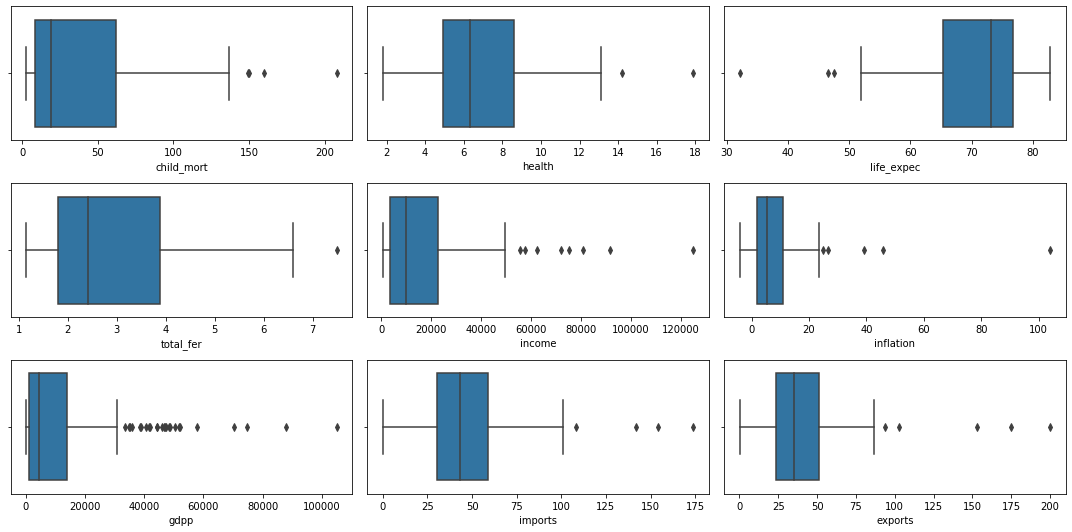

In [19]:
# let's visulize the same via box plot for better understanding 

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df1_country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df1_country['health'], ax = axs[0,1])
plt3 = sns.boxplot(df1_country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df1_country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df1_country['income'], ax = axs[1,1])
plt6 = sns.boxplot(df1_country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df1_country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df1_country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df1_country['exports'], ax = axs[2,2])


plt.tight_layout() #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
plt.savefig('Boxplot before outlier treatment')

#### Inference:

- As we can observer that there are outliers present in data set so what we can do statistical so will do caping so that will not loose any coutry for operation

In [20]:
# We will cap the outliers to values accordingly for analysis.

percentiles = df1_country['child_mort'].quantile([0.05,0.95]).values
df1_country['child_mort'][df1_country['child_mort'] <= percentiles[0]] = percentiles[0]
df1_country['child_mort'][df1_country['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['health'].quantile([0.05,0.95]).values
df1_country['health'][df1_country['health'] <= percentiles[0]] = percentiles[0]
df1_country['health'][df1_country['health'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['life_expec'].quantile([0.05,0.95]).values
df1_country['life_expec'][df1_country['life_expec'] <= percentiles[0]] = percentiles[0]
df1_country['life_expec'][df1_country['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['total_fer'].quantile([0.05,0.95]).values
df1_country['total_fer'][df1_country['total_fer'] <= percentiles[0]] = percentiles[0]
df1_country['total_fer'][df1_country['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['income'].quantile([0.05,0.95]).values
df1_country['income'][df1_country['income'] <= percentiles[0]] = percentiles[0]
df1_country['income'][df1_country['income'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['inflation'].quantile([0.05,0.95]).values
df1_country['inflation'][df1_country['inflation'] <= percentiles[0]] = percentiles[0]
df1_country['inflation'][df1_country['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['gdpp'].quantile([0.05,0.95]).values
df1_country['gdpp'][df1_country['gdpp'] <= percentiles[0]] = percentiles[0]
df1_country['gdpp'][df1_country['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['imports'].quantile([0.05,0.95]).values
df1_country['imports'][df1_country['imports'] <= percentiles[0]] = percentiles[0]
df1_country['imports'][df1_country['imports'] >= percentiles[1]] = percentiles[1]

percentiles = df1_country['exports'].quantile([0.05,0.95]).values
df1_country['exports'][df1_country['exports'] <= percentiles[0]] = percentiles[0]
df1_country['exports'][df1_country['exports'] >= percentiles[1]] = percentiles[1]

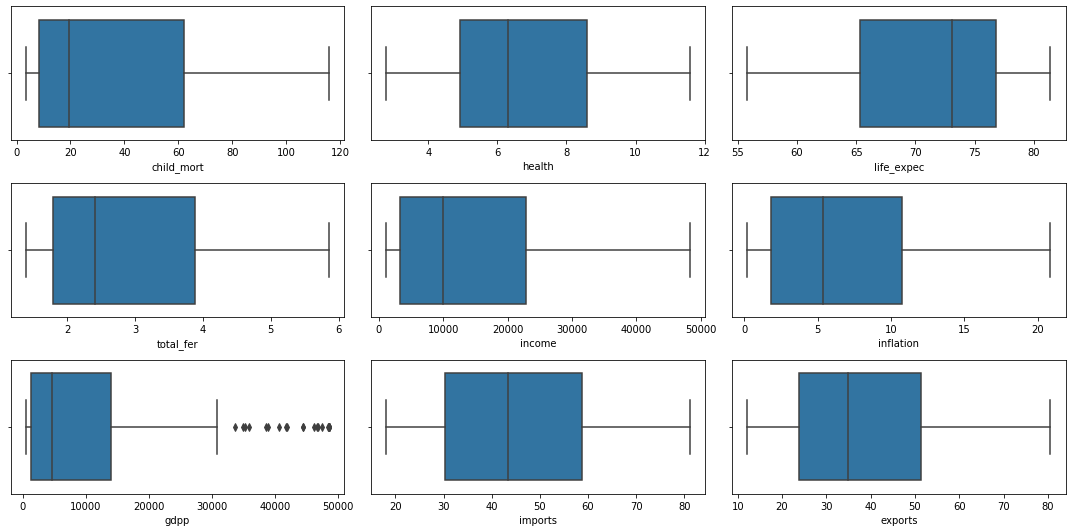

In [21]:
# lets see the boxplot again for outlier

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df1_country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df1_country['health'], ax = axs[0,1])
plt3 = sns.boxplot(df1_country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df1_country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df1_country['income'], ax = axs[1,1])
plt6 = sns.boxplot(df1_country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df1_country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df1_country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df1_country['exports'], ax = axs[2,2])

plt.tight_layout() #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
plt.savefig('Boxplot after outlier treatment')


In [22]:
# see the head part of data set now
df1_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


In [23]:
# shape of data after outlier treatment 
df1_country.shape

(167, 10)

In [24]:
# verify of data shape after outlier treatment 
country.shape

(167, 10)

In [25]:
# see the statistical data again after the outlier treatment
df1_country.describe(percentiles= [0.25,0.50,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,39.310838,6.767419,45.364251,15755.491018,7.016075,70.830060,2.922389,12003.719162
std,36.193830,19.886059,2.529308,18.303537,14770.353771,6.271398,8.039216,1.438264,15154.443890
min,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,79.709000,11.549000,81.098000,47513.000000,20.849000,81.400000,5.854700,48547.000000
99%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


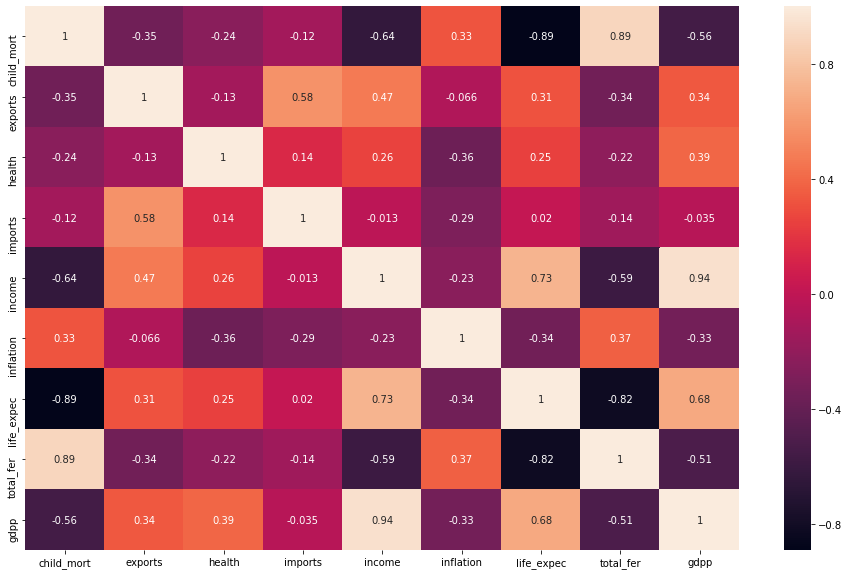

In [26]:
# Lets see the heatmap again for correalation

plt.figure(figsize = (16, 10))
sns.heatmap(df1_country.corr(), annot = True)
plt.savefig('heatmap after the outlier treatment')


# Scaling the data

- Cluster analysis is because groups are defined based on the distance between points in mathematical space. Standardization helps to make the relative weight of each variable equal by converting each variable to a unitless measure or relative distance.


In [27]:
# define the StandardScaler object
scaler = StandardScaler()

In [28]:
# store the all feature columns to collist
collist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [29]:
# see the head part of data
df1_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


In [30]:
# scaling the data with fit_transform()
df1_country[collist] = scaler.fit_transform(df1_country[collist])

In [31]:
# let check head of data after the scaling 
df1_country[collist].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


<a id="5"></a>
# Step 5: PCA (Principal Components Analysis)

- Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA).

In [32]:
# let do the PCA now

pca = PCA(svd_solver='randomized', random_state=42)


#### Singular Value Decomposition, or SVD, is a computational method often employed to calculate principal components for a dataset. Using SVD to perform PCA is efficient and numerically robust.
#### If randomized :run randomized SVD by the method of Halko et al.

In [33]:
# Putting feature variable to var

var= df1_country.drop(['country'],axis=1)

# Putting response variable to country_name
country_name = df1_country['country']

In [34]:
# var data
var.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [35]:
# country data
country_name.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [36]:
# let apply the PCA of scalted data
pca.fit(var)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [37]:
# pca.components_ : components_ is the set of all eigenvectors (aka loadings) for your projection space
#(one eigenvector for each principal component). Once you have the eigenvectors using pca.
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [38]:
# pca.explained_variance_ratio_ : - Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

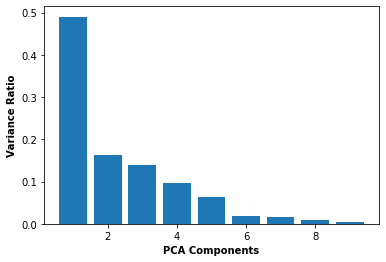

In [39]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')
plt.savefig('Variance Ratio of each PCA components')

In [40]:
# taking the cumulative sum of the elements

var_cum = np.cumsum(pca.explained_variance_ratio_)

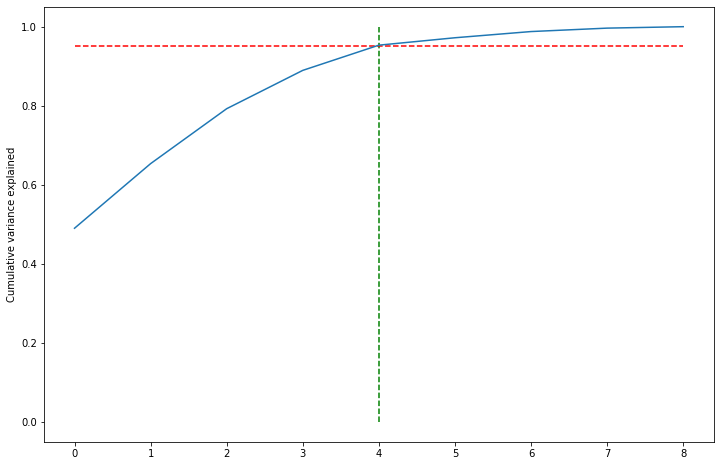

In [41]:
# dreawing the plot and will oberve how many components are explaing the 95% of data
# I took the 4 components after visualization

fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.95, xmax=8, xmin=0, colors="r", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.savefig('Cumulative variance explained')


#### Inference: 

- We can see that four components are explaining 95% of the data

In [42]:
# Checking which attributes are well explained by the pca components

attributes_pca = pd.DataFrame({'Attribute':list(var),'PC-1':pca.components_[0],'PC-2':pca.components_[1],'PC-3':pca.components_[2],'PC-4':pca.components_[3]})
attributes_pca

,Attribute,PC-1,PC-2,PC-3,PC-4
0,child_mort,-0.421623,-0.032585,-0.094262,0.387864
1,exports,0.232156,-0.599838,0.295282,0.252625
2,health,0.181381,0.191686,-0.646498,0.283765
3,imports,0.094524,-0.729981,-0.283589,0.012585
4,income,0.410887,0.110986,0.198015,0.419843
5,inflation,-0.225176,0.079882,0.590478,0.169649
6,life_expec,0.431881,0.129883,0.113004,-0.225216
7,total_fer,-0.406693,-0.008781,-0.060062,0.446607
8,gdpp,0.393765,0.184042,0.035916,0.499832


##### 4 components are describing the 95% of the variance in the dataset. let choose the 4 components

### Incremental principal components analysis (IPCA):

- Linear dimensionality reduction using Singular Value Decomposition of the data, keeping only the most significant singular vectors to project the data to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [43]:
# Incremental principal components analysis (IPCA).

pca_final = IncrementalPCA(n_components=4)

In [44]:
# final PCA on data 
df_pca_final = pca_final.fit_transform(var)

In [45]:
# shape of the data
df_pca_final.shape

(167, 4)

In [46]:
# type of the data
type(df_pca_final)

numpy.ndarray

In [47]:
# let define the dataframe and with columns name
df_pca_final = pd.DataFrame(df_pca_final, columns=["PC-1","PC-2","PC-3","PC-4"])
df_pca_final.head()

,PC-1,PC-2,PC-3,PC-4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [48]:
# the correlation coefficient of new final PCA dataset and values shouls near to zero
corr = np.corrcoef(df_pca_final.transpose())

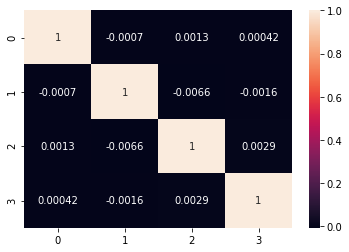

In [49]:
# heatmap to see the correlation coefficient value of final PCA data
sns.heatmap(corr, annot = True)
plt.savefig('Heatmap after PCA')

#### Heatmap giving the result approx. 0 which we need as per PCA logic

In [50]:
# final PCA data head part
df_pca_final.head()

,PC-1,PC-2,PC-3,PC-4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


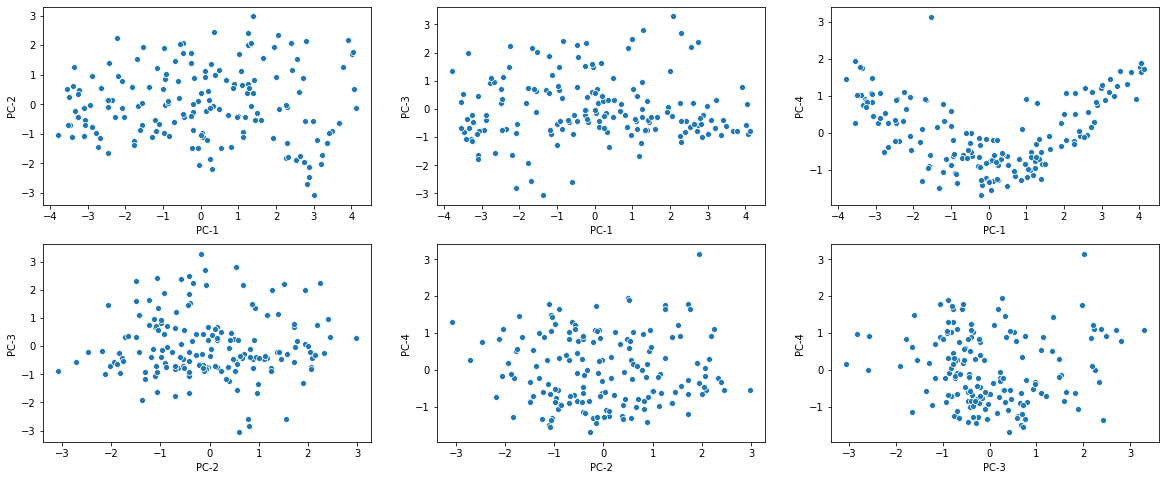

In [51]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=df_pca_final, x='PC-1', y='PC-2')
plt.subplot(2,3,2)
sns.scatterplot(data=df_pca_final, x='PC-1', y='PC-3')
plt.subplot(2,3,3)
sns.scatterplot(data=df_pca_final, x='PC-1', y='PC-4')
plt.subplot(2,3,4)
sns.scatterplot(data=df_pca_final, x='PC-2', y='PC-3')
plt.subplot(2,3,5)
sns.scatterplot(data=df_pca_final, x='PC-2', y='PC-4')
plt.subplot(2,3,6)
sns.scatterplot(data=df_pca_final, x='PC-3', y='PC-4')

plt.savefig('Scatter Plot to visualize the spread of data across PCA components')

<a id="6"></a> <br>
# Step 6: Hopkins Statistics Test

###### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [52]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [53]:
hopkins(df_pca_final)

0.7238128322076747

#### here, the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

<a id="7"></a> <br>
# Step 7: Model Building

### K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

##### The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [54]:
# Silhouette Analysis:
SSE = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i).fit(df_pca_final)
    SSE.append([i, silhouette_score(df_pca_final, kmeans.labels_)])

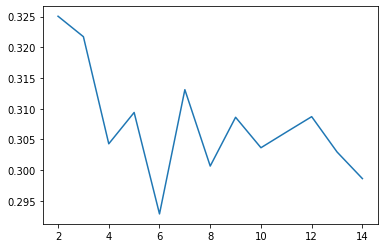

In [55]:
# plot of Silhouette 
plt.plot(pd.DataFrame(SSE)[0],pd.DataFrame(SSE)[1])
plt.savefig('Silhouette plot')

In [56]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise KMeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3250564127058999
For n_clusters=3, the silhouette score is 0.32172840937043035
For n_clusters=4, the silhouette score is 0.30719758172454154
For n_clusters=5, the silhouette score is 0.3118543434814181
For n_clusters=6, the silhouette score is 0.29647521740441957
For n_clusters=7, the silhouette score is 0.313714758575628
For n_clusters=8, the silhouette score is 0.304648962590413


# Sum of Squared Distances:¶

#### Elbow Curve to get the right number of Clusters
- A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

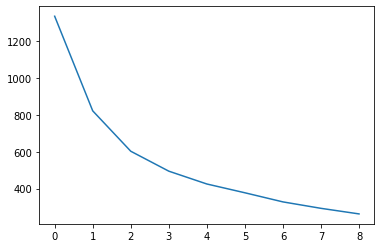

In [57]:
# lets draw the Elbow Curve to get the right number of Clusters
SSD = []

for num_cluster in list(range(1,10)):
    model_clus = KMeans(n_clusters=num_cluster, max_iter=50)
    model_clus.fit(df_pca_final)
    SSD.append(model_clus.inertia_)

plt.plot(SSD)
plt.savefig('Elbow Curve')

#### By looking silhouette analysis, we see the highest peak is at k =4 and in sum of squared distances graph ,
#### we see that the elbow is in the range of 3 to 5 , so let us take k as 4.

#### lets go with Kmeans with K= 4

In [58]:
# let's apply the KMeans on final PCA data set 
cluster_4 = KMeans(n_clusters=4,max_iter=50,random_state=50)
cluster_4.fit(df_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [59]:
# Cluster labels
cluster_4.labels_

array([3, 0, 2, 3, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 3, 0, 2, 0, 3,
       2, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 2, 2, 2, 3, 3, 3, 0, 3, 0, 1, 0,
       1, 2, 2, 2, 0, 3, 3, 0, 0, 1, 1, 2, 3, 0, 1, 3, 1, 0, 2, 3, 3, 0,
       3, 0, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 0, 2, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 2, 0, 1, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 3, 2, 3, 2,
       1, 1, 3, 3, 1, 2, 3, 0, 0, 2, 2, 0, 1, 1, 2, 2, 3, 0, 2, 3, 0, 0,
       3, 1, 0, 1, 0, 3, 1, 1, 2, 0, 3, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 2,
       0, 3, 0, 1, 1, 1, 2, 2, 0, 2, 0, 3, 3])

In [60]:
# assign the label to cluster ID
df_pca_final['Cluster_Id'] = cluster_4.labels_
df_pca_final.head()

,PC-1,PC-2,PC-3,PC-4,Cluster_Id
0,-3.275720,-0.427284,-1.055199,0.906249,3
1,0.483960,-0.161179,-0.284769,-1.425874,0
2,-0.447318,-0.424388,1.832563,-0.622794,2
3,-3.359135,1.259644,1.980609,1.750224,3
4,1.244074,0.697703,-0.269676,-0.771221,0


In [61]:
# check the country_name datframe
country_name.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

#### Inference:
- In each clusters, there are good number of Country

In [62]:
# add the country columns to df_pca_final df

df_pca_final = pd.concat([country_name,df_pca_final], axis=1, join='outer')

In [63]:
# see the head part of the dataframe
df_pca_final.head()


,country,PC-1,PC-2,PC-3,PC-4,Cluster_Id
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,3
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,0
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,2
3,Angola,-3.359135,1.259644,1.980609,1.750224,3
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,0


In [64]:
# Number of countries in each cluster
df_pca_final['Cluster_Id'].value_counts()

0    51
3    47
2    35
1    34
Name: Cluster_Id, dtype: int64

In [65]:
# shape of the PCA final clusterred data frame
df_pca_final.shape

(167, 6)

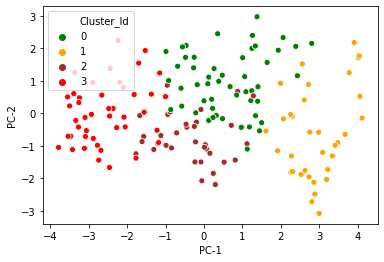

In [66]:
# scatter plot for PC1, PC2 and Cluster_ID
sns.scatterplot(x='PC-1',y='PC-2',hue='Cluster_Id',legend='full',data=df_pca_final, palette=['green','orange','brown','red'])
plt.savefig('scatter plot for PC1, PC2 and Cluster_ID')

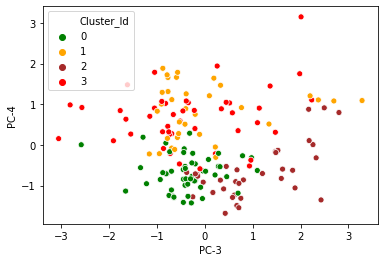

In [67]:
# scatter plot for PC3, PC4 and Cluster_ID
sns.scatterplot(x='PC-3',y='PC-4',hue='Cluster_Id',legend='full',data=df_pca_final,palette=['green','orange','brown','red'])
plt.savefig('scatter plot for PC3, PC4 and Cluster_ID')

In [68]:
# verify the country data
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [69]:
# Merging the df PCA with original df country

df_merge = pd.merge(country,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]


In [70]:
# see the head part of merged data
df_merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,48.6,6.55,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,31.4,4.17,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,42.9,2.85,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,58.9,6.03,19100,1.44,76.8,2.13,12200,0


In [71]:
# Creating df with mean values of each columns
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

In [72]:
# concat the mean calculated data for each cluster ID
country_mean_via_cluster = pd.concat([pd.Series([0,1,2,3]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
country_mean_via_cluster.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
country_mean_via_cluster.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.852941,51.235294,62.678431,6.920392,12236.078431,3.839882,73.076471,2.188431,6874.039216
1,1,5.194118,54.538235,47.138235,8.813235,46626.470588,2.731971,80.150000,1.784118,44126.470588
2,2,27.031429,30.588257,28.641883,5.225429,13766.285714,12.857714,72.637143,2.435143,6622.800000
3,3,92.721277,28.240638,43.168085,6.441277,3659.638298,11.932447,59.329787,4.995957,1751.914894


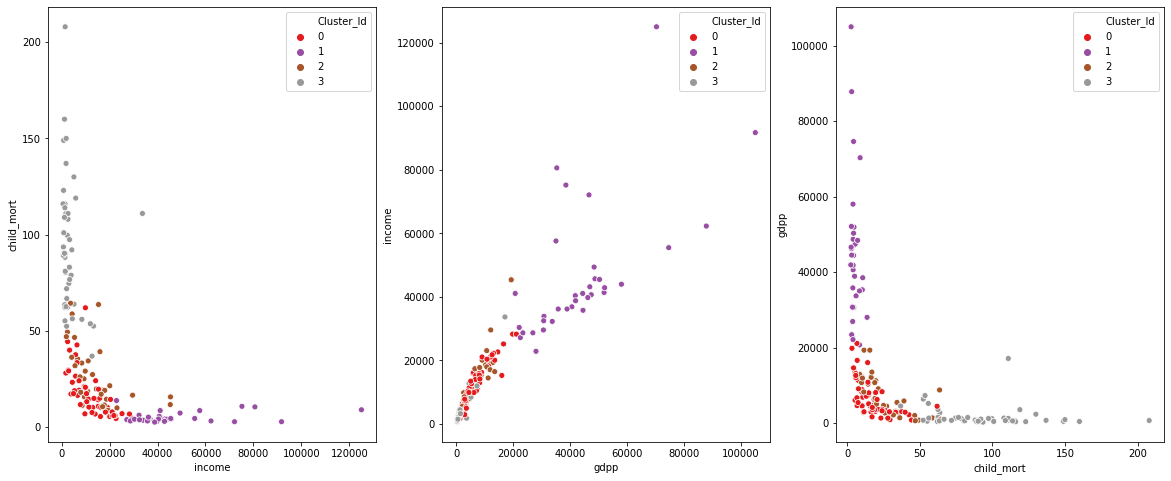

In [73]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1")
plt.savefig(' Scatter plot on Original attributes to visualize the spread of the data')

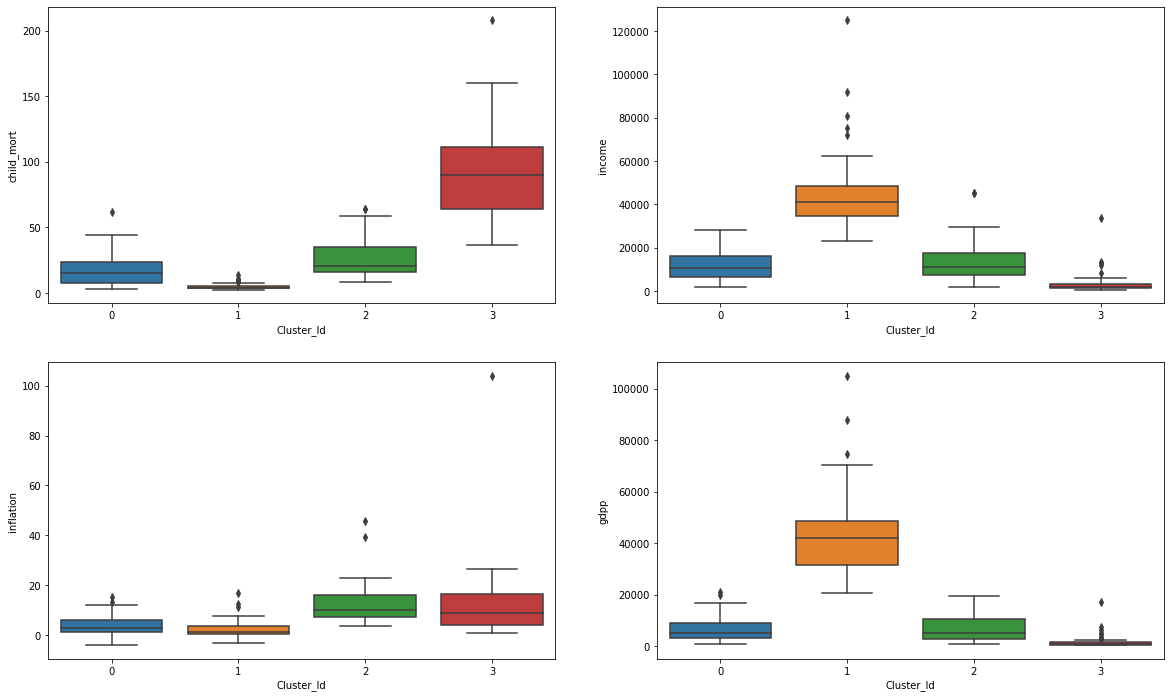

In [74]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(20,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.savefig('Box plot on Original attributes to visualize the spread of the data')

#### Inference:

- Child Mortality is highest for Cluster 3.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 3. Hence, these countries need some help.

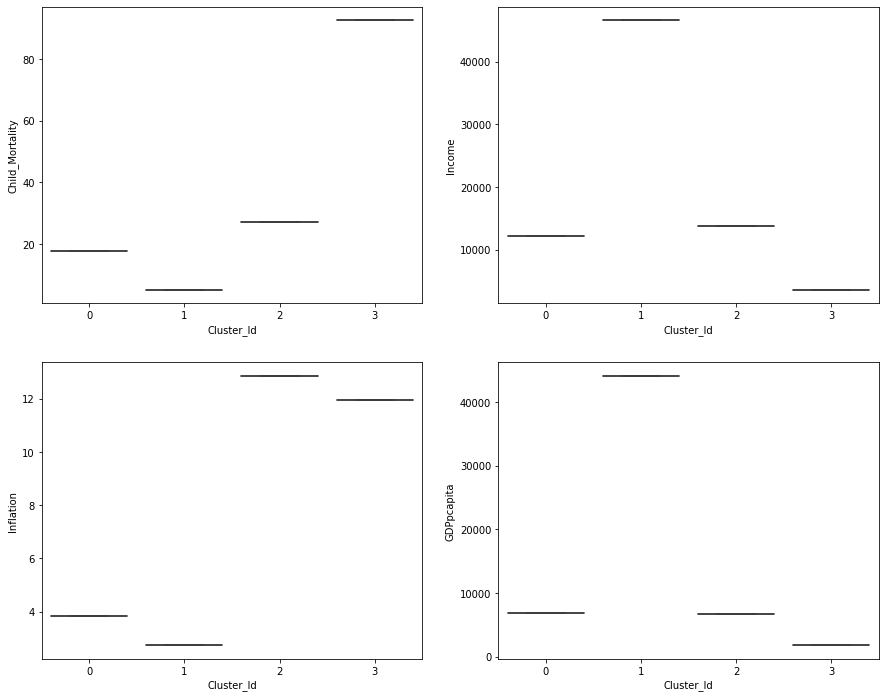

In [75]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = country_mean_via_cluster,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = country_mean_via_cluster,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=country_mean_via_cluster,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=country_mean_via_cluster,ax=axes[1][1])
plt.savefig('Box plot to visualise the mean value of few original attributes')

In [76]:
# country_mean_via_cluster data and see the mean data of each feature components
country_mean_via_cluster.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.852941,51.235294,62.678431,6.920392,12236.078431,3.839882,73.076471,2.188431,6874.039216
1,1,5.194118,54.538235,47.138235,8.813235,46626.470588,2.731971,80.150000,1.784118,44126.470588
2,2,27.031429,30.588257,28.641883,5.225429,13766.285714,12.857714,72.637143,2.435143,6622.800000
3,3,92.721277,28.240638,43.168085,6.441277,3659.638298,11.932447,59.329787,4.995957,1751.914894


In [77]:
# List of countries in Cluster 0
Country_Clsuetr_3 = df_merge_col[df_merge_col['Cluster_Id']==3]
Country_Clsuetr_3.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.3,42.9,2.85,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.8,37.2,4.10,1820,0.885,61.8,5.36,758,3
21,Botswana,52.5,43.6,51.3,8.30,13300,8.920,57.1,2.88,6350,3
25,Burkina Faso,116.0,19.2,29.6,6.74,1430,6.810,57.9,5.87,575,3


#### Looking at the graph we are certain that cluster 3 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. 2nd Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp

<a id="8"></a>
# Step8 : Hierarchical Clustering:

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [78]:
# PCA final data
df_pca_final.head()

,country,PC-1,PC-2,PC-3,PC-4,Cluster_Id
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,3
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,0
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,2
3,Angola,-3.359135,1.259644,1.980609,1.750224,3
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,0


In [79]:
# lets drop the country and Cluster_ID so that we can apply the Hierarchical on PCA components 
df_pca = df_pca_final.drop(['country','Cluster_Id'], axis=1)

In [80]:
# verify the data
df_pca.head()

,PC-1,PC-2,PC-3,PC-4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


**Single Linkage:<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
![](https://www.saedsayad.com/images/Clustering_single.png)

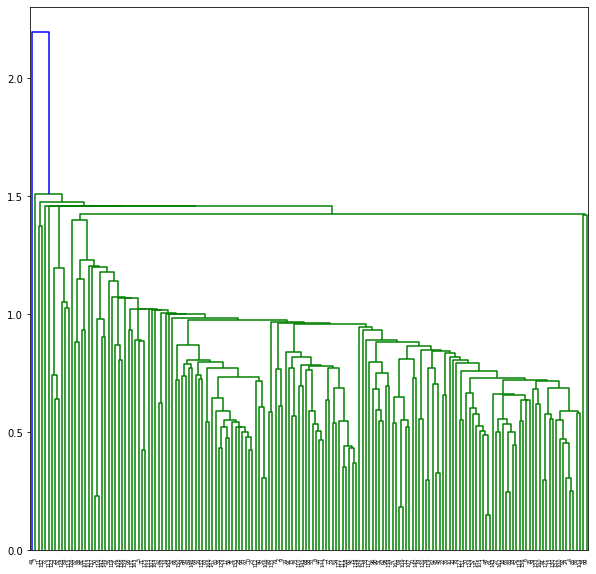

In [81]:
# heirarchical clustering single method
df_clustering = df_pca
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.savefig('heirarchical clustering single method')
#plt.show()


In [82]:
#By single method heirarchical clustering things are not clear, so let us go for complete heirarchical clustering method.

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 
![](https://www.saedsayad.com/images/Clustering_complete.png)

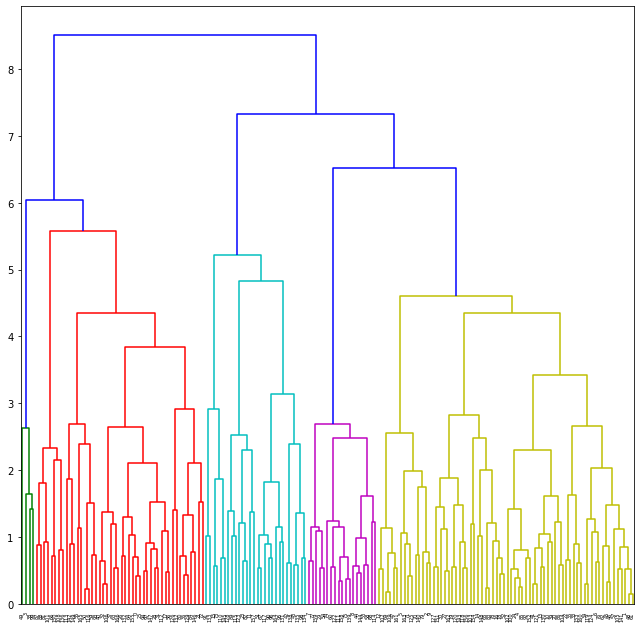

In [83]:
# heirarchical clustering with complete method
fig = plt.figure(figsize = (11,11))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.savefig('heirarchical clustering complete method')
#plt.show()


In [84]:
# Let us cut the dendrogram vertically such that n_clusters = 5

In [85]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))

In [86]:
# lets copy the data for further operation
df_hc_country = df_pca.copy()

In [87]:
# head part of the data
df_hc_country.head()

,PC-1,PC-2,PC-3,PC-4
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [88]:
# lets add the country columns to this dataframe
df_hc_country = pd.concat([country_name,df_hc_country], axis=1, join='outer')

In [89]:
# head part of this data frame
df_hc_country.head()

,country,PC-1,PC-2,PC-3,PC-4
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249
1,Albania,0.483960,-0.161179,-0.284769,-1.425874
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794
3,Angola,-3.359135,1.259644,1.980609,1.750224
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221


In [90]:
# adding the cluster id to this dataframe
df_hc_final = pd.concat([df_hc_country, clusterCut], axis=1)
df_hc_final.columns = ['country', 'PC-1', 'PC-2','PC-3','PC-4','Cluster_Id']


In [91]:
df_hc_final.head()

,country,PC-1,PC-2,PC-3,PC-4,Cluster_Id
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


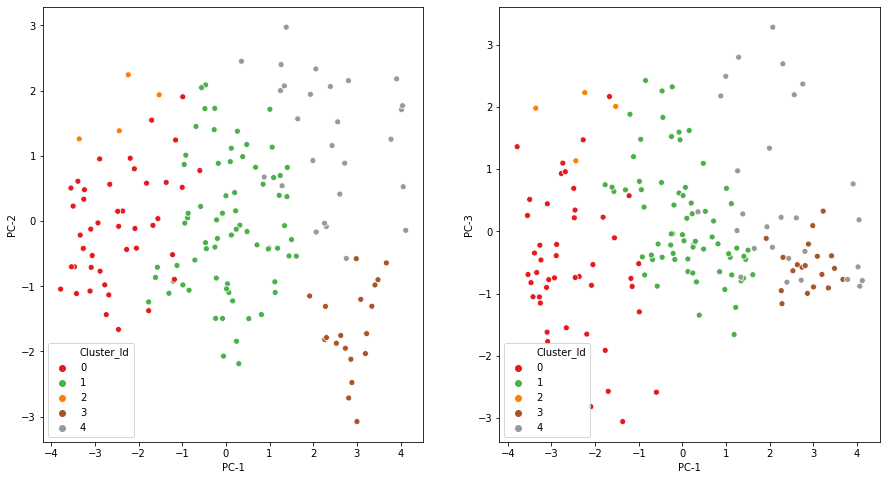

In [92]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC-1',y='PC-2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc_final,ax=axes[0])
sns.scatterplot(x='PC-1',y='PC-3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc_final,ax=axes[1])
plt.savefig('heirarchical clustering- Scatter plot on Principal components to visualize the spread of the data')

#### Inference:
- Cluster 4 is not formed properly

In [93]:
# view the df
df_hc_final.head()

,country,PC-1,PC-2,PC-3,PC-4,Cluster_Id
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


In [94]:
# Number of countries in each cluster

df_hc_final['Cluster_Id'].value_counts()

1    70
0    46
4    28
3    19
2     4
Name: Cluster_Id, dtype: int64

In [95]:
# merging the dataframe and Clusterred data frame 
clustered_data_hc = df_hc_final[['country','Cluster_Id']].merge(country, on = 'country')
clustered_data_hc.head()

,country,Cluster_Id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [96]:
# Creating df with mean values
hc_child_mort =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).child_mort.mean())
hc_exports =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).exports.mean())
hc_health =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).health.mean())
hc_imports =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).imports.mean())
hc_income =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).income.mean())
hc_inflation =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).inflation.mean())
hc_life_expec =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).life_expec.mean())
hc_total_fer =pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).total_fer.mean())
hc_gdpp = pd.DataFrame(clustered_data_hc.groupby(["Cluster_Id"]).gdpp.mean())

In [97]:
# concat the mean value of each featured columns with cluster ID
df_hc_mean= pd.concat([pd.Series(list(range(0,5))),hc_child_mort,hc_exports, hc_health, hc_imports,
               hc_income, hc_inflation, hc_life_expec,hc_total_fer,hc_gdpp], axis=1)
df_hc_mean.columns = ["Cluster_Id", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_hc_mean

,Cluster_Id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


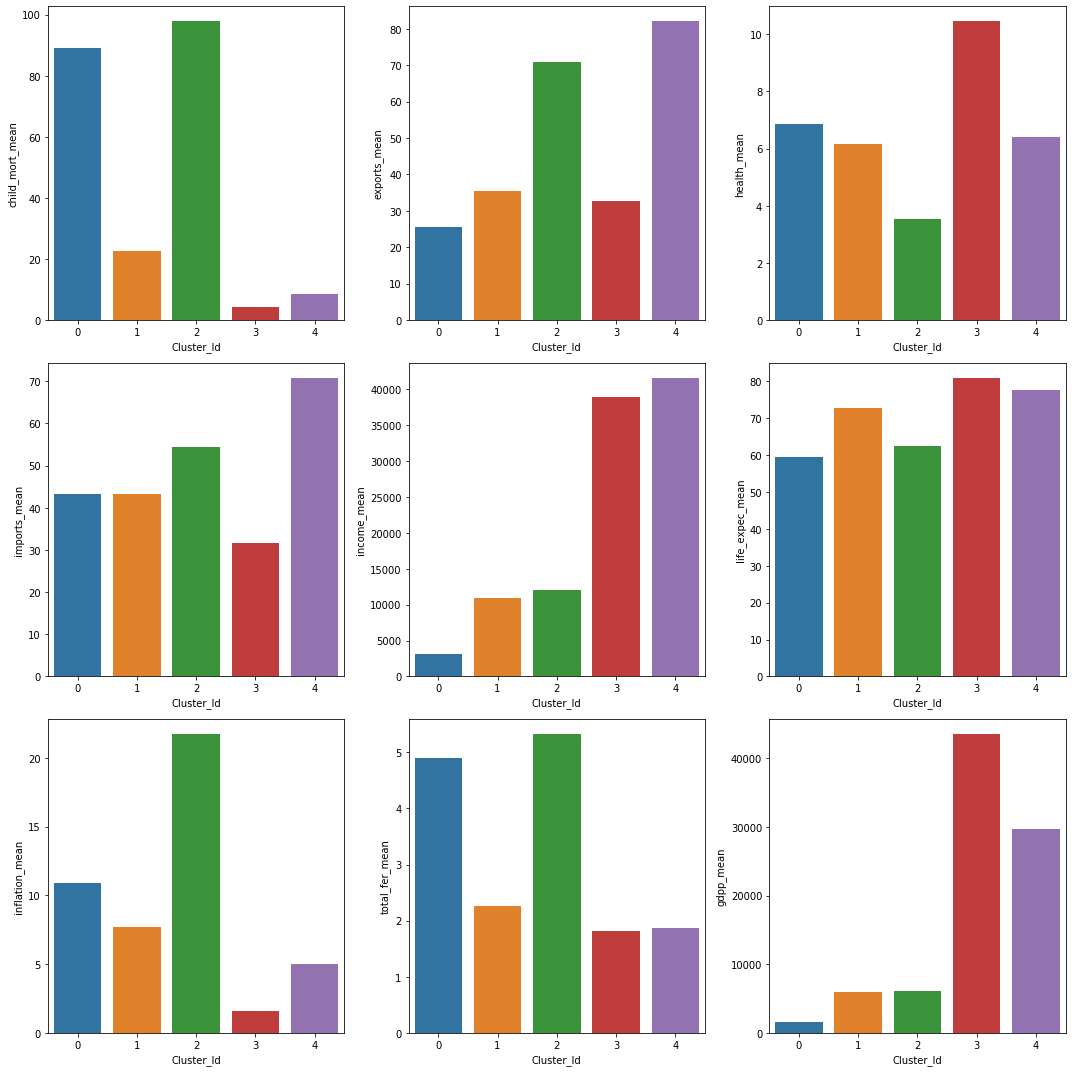

In [98]:
# barplot of the mean data for visualization

fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.exports_mean, ax = axs[0,1])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.health_mean, ax = axs[0,2])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.imports_mean, ax = axs[1,0])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.income_mean, ax = axs[1,1])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.inflation_mean, ax = axs[2,0])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df_hc_mean.Cluster_Id, y=df_hc_mean.gdpp_mean, ax = axs[2,2])
plt.tight_layout() #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
plt.savefig('heirarchical clustering - barplot of the mean data for visualization')

In [99]:
# store the cluster 0 data frame
dfhc_cluster_0 = clustered_data_hc[clustered_data_hc.Cluster_Id == 0]

In [100]:
# cluster 0 dataframe
dfhc_cluster_0.head()

,country,Cluster_Id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
17,Benin,0,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
21,Botswana,0,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350
25,Burkina Faso,0,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,0,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231


#### Conclustion for Clustering - 
**We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical.
The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial.
So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.**

<a id="9"></a> <br>
# Step 9: Final Analysis

### K-Means clustering result

- We got the cluster '3' which need of aid. So, let's find the list of country.


In [101]:
# cluster-3 data of K_means clustering
Country_Clsuetr_3.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.3,42.9,2.85,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.8,37.2,4.10,1820,0.885,61.8,5.36,758,3
21,Botswana,52.5,43.6,51.3,8.30,13300,8.920,57.1,2.88,6350,3
25,Burkina Faso,116.0,19.2,29.6,6.74,1430,6.810,57.9,5.87,575,3


In [102]:
# lets check the shape of this data
Country_Clsuetr_3.shape

(47, 11)

In [103]:
# lets see the statistical data
Country_Clsuetr_3.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.721277,28.240638,43.168085,6.441277,3659.638298,11.932447,59.329787,4.995957,1751.914894,3.0
std,33.630330,17.766743,17.537192,2.627875,5382.124146,15.495159,6.599668,1.055647,2779.560247,0.0
min,36.900000,2.200000,17.200000,2.200000,609.000000,0.885000,32.100000,2.590000,231.000000,3.0
25%,63.750000,16.650000,30.450000,4.640000,1390.000000,4.010000,56.650000,4.535000,550.000000,3.0
50%,90.200000,23.800000,42.700000,5.690000,1870.000000,8.920000,59.500000,5.060000,769.000000,3.0
75%,111.000000,36.900000,50.450000,8.105000,3345.000000,16.350000,63.300000,5.635000,1385.000000,3.0
max,208.000000,85.800000,101.000000,13.100000,33700.000000,104.000000,71.100000,7.490000,17100.000000,3.0


In [104]:
# We observed that mean child mortality is 92.72 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

final_list = Country_Clsuetr_3[Country_Clsuetr_3['child_mort']>92]
final_list.shape

(21, 11)

In [105]:
# lets see the statistical data again for this dataframe after filtering the child mortality > 92.72
final_list.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,30.724762,43.080952,6.104286,3639.190476,14.191667,56.547619,5.431905,1708.190476,3.0
std,27.164489,19.073261,18.267337,2.859235,7039.657972,21.894914,7.401798,1.042999,3607.677295,0.0
min,92.100000,8.920000,17.400000,2.200000,609.000000,0.885000,32.100000,3.300000,231.000000,3.0
25%,108.000000,16.800000,34.500000,4.480000,1190.000000,4.150000,55.600000,5.110000,446.000000,3.0
50%,114.000000,23.800000,42.900000,5.130000,1820.000000,6.810000,57.700000,5.340000,708.000000,3.0
75%,130.000000,39.400000,49.100000,6.910000,2690.000000,17.200000,60.100000,6.160000,1200.000000,3.0
max,208.000000,85.800000,101.000000,13.100000,33700.000000,104.000000,68.200000,7.490000,17100.000000,3.0


In [106]:
# We observed that mean income is 3639 for the selected clusters and hence 
# let's take all the countries with less than this income .

final_list_1 = final_list[final_list['income']<=3639]
final_list_1.shape

(17, 11)

In [107]:
# lets see the statistical data again for this dataframe after filtering  mean income > 363

final_list_1.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,26.96000,45.064706,6.681765,1611.352941,7.989706,55.335294,5.471176,698.352941,3.0
std,29.176320,12.93841,17.917238,2.831667,781.538942,6.497282,7.693174,1.074778,345.567638,0.0
min,93.600000,8.92000,26.500000,3.980000,609.000000,0.885000,32.100000,3.300000,231.000000,3.0
25%,108.000000,16.80000,35.100000,4.930000,918.000000,2.970000,55.000000,5.110000,419.000000,3.0
50%,114.000000,22.80000,43.200000,5.210000,1430.000000,5.450000,57.300000,5.340000,648.000000,3.0
75%,137.000000,36.80000,49.100000,7.910000,1930.000000,12.300000,58.000000,6.260000,897.000000,3.0
max,208.000000,50.70000,101.000000,13.100000,3320.000000,20.800000,68.200000,7.490000,1310.000000,3.0


In [108]:
# We observed that mean gdpp is 698 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

final_list_2 = final_list_1[final_list_1['gdpp']<=698]
final_list_2.shape

(10, 11)

In [109]:
# so, we got the final country list
final_list_2.head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
25,Burkina Faso,116.0,19.20,29.6,6.74,1430,6.81,57.9,5.87,575,3
26,Burundi,93.6,8.92,39.2,11.60,764,12.30,57.7,6.26,231,3
31,Central African Republic,149.0,11.80,26.5,3.98,888,2.01,47.5,5.21,446,3
37,"Congo, Dem. Rep.",116.0,41.10,49.6,7.91,609,20.80,57.5,6.54,334,3
63,Guinea,109.0,30.30,43.2,4.93,1190,16.10,58.0,5.34,648,3
64,Guinea-Bissau,114.0,14.90,35.2,8.50,1390,2.97,55.6,5.05,547,3
66,Haiti,208.0,15.30,64.7,6.91,1500,5.45,32.1,3.33,662,3
106,Mozambique,101.0,31.50,46.2,5.21,918,7.64,54.5,5.56,419,3
112,Niger,123.0,22.20,49.1,5.16,814,2.55,58.8,7.49,348,3
132,Sierra Leone,160.0,16.80,34.5,13.10,1220,17.20,55.0,5.20,399,3


<a id="10"></a> <br>
# Step 10 : Closing Statement and list of country direst need of aid. 

- Finaly we got the list of Countries which are in dire need of aid. 

- We have been used PCA for reduce the dimension and got the Principle Components.

- Then, we have used our Clustering technique to grouped the coutries and got the some inference.

- Later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country

- The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.


#### As per K- means clustering, the country which are direst need of aid are:

- Burkina Faso
- Burundi
- Central African Republic
- Congo, Dem. Rep.
- Guinea
- Guinea-Bissau
- Haiti
- Mozambique
- Niger
- Sierra Leone

# Thank you